# ALY6140 Captstone Project: Analysis of Consumer Complaints Database 

ALY6140 71697 Analytics Systems Technology Fall A
College of Professional Studies, Northeastern University, Boston, MA 02115.
WEEK 6 : FINAL PROJECT
Submission date : 10/24/20
Submitted by:
Group 6 : 1.Nikhil Sakinal
          2.Rutvi Kantawala
          3.Spurthi Patnam
          4.Aishwarya Subramanya
Instructor name : Kamen Madjarov
Analysis on : Consumer Complaints Dataset

#### Importing the Python script module, main() is the function created in  ALY6140_Capstone_Project_Group_6.py file and we have called the main function in this file for further analysis. Main function imports the data, cleans the data and performs model building to show the below classification metrics.

In [1]:
file = __import__("ALY6140_Capstone_Project_Group_6")
file.main()

C:\Users\Aishu\Downloads\ALY6140_Capstone_Project_Group_6.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaints_data['category_id'] = complaints_data['Product'].factorize()[0]
C:\Users\Aishu\Downloads\ALY6140_Capstone_Project_Group_6.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaints_data['Month']=complaints_data['Month'].apply(mapper)


Accuracy:  0.681821107412788
                                                                              precision    recall  f1-score   support

                                                             Debt collection       0.78      0.28      0.41     15494
Credit reporting, credit repair services, or other personal consumer reports       0.79      0.38      0.51     19028
                                                 Credit card or prepaid card       0.65      0.97      0.78    115048
                                                       Vehicle loan or lease       0.80      0.38      0.52     35015
                                                 Checking or savings account       0.80      0.39      0.52      4236
                          Money transfer, virtual currency, or money service       0.89      0.39      0.55     16619
                                                                    Mortgage       0.68      0.24      0.36      3017
                          

# 1.1 Data Extraction

Importing the required Libraries and Loading the dataset from the Consumer Financial Protection Bureau Portal

In [2]:
#Importing the libraries
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#df = pd.read_csv('complaints.csv') #loading from local folder for internal purposes
df = pd.read_csv('https://files.consumerfinance.gov/ccdb/complaints.csv.zip', sep=',') #reading the csv file from the url
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
3,2019-09-15,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,Pioneer has committed several federal violatio...,NaN,Pioneer Capital Solutions Inc,CA,925XX,NaN,Consent provided,Web,2019-09-15,Closed with explanation,Yes,NaN,3374555
4,2019-01-24,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Card was charged for something you did not pur...,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,TX,787XX,NaN,NaN,Referral,2019-01-25,Closed with explanation,Yes,NaN,3133345


## 1.1.1 Introduction and Background

Consumers in the United States complain about a variety of products, services, companies etc. It is also difficult to understand what are the factors that really are responsible for the complaints. In order to obtain better insight on the characteristics pertaining to that of the consumer complaints,  we try to analyse this dataset and try to answer some of the business questions (Accross All States) with visualisations like,

1. Top 10 companies by complaint
2. Top 10 complaints by product
3. Top 5 complaints by company response
4. Number of complaints with timely response
5. Number of complaints by day of week
6. Volume of complaints by state

#### User Story 

Whenever a complaint is submitted, consumers are heard by the companies, and they try to resolve them efficiently and also the companies or the products can learn from the complaint and make sure to resolve them permanently, also to avoid similar ones. Every complaint provides insight into problems that people are experiencing, helping the companies identify inappropriate practices and also enabling them to follow some of the best practices, and stopping them before they become major issues. 

With the analysis of this dataset, the aim is better outcomes for consumers.

Reference: https://www.irjet.net/archives/V6/i3/IRJET-V6I3625.pdf

#### Research Questions

1. Identifying the number of complaints recorded by company
2. Number of complaints received for each product and year
3. Identify the percentage of complaints by companies for the year 2020



## 1.1.2 Data Description

Dataset: Consumer Complaints database (US)

Description: This data set contains the complaints made by American consumers to the Consumer Finance Protection Bureau (CFPB) about financial product and services offered by financial institutions in the United States.

Our dataset will contain complaints for the years 2018,2019,2020

Link: https://catalog.data.gov/dataset/consumer-complaint-database#topic=consumer_navigation

Actual Number of observations: 180946

No of Observations considered: 870063 (2018, 2019, 2020)

No of Parameters - 21

Time Period - 3 Years

#### Data assessment

1. Complaint ID is the non-date numeric column
3. Consists of 8,44,889 complaints
4. Complaint ID can be treated as the index column




## 1.2 Data Cleaning

In [3]:
#Conversion of data types of 'Date received' and 'Date sen to company' from object to datetime
df["Date received"] = pd.to_datetime(df["Date received"])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])

#Creating new features 'Year', 'Month', 'Week Number'
df['Year'] = df['Date received'].dt.year
df['Month'] = df['Date received'].dt.month
df['Week Number']=df['Date received'].dt.week

In [4]:
# Function to eliminate extra characters and symbols from the column ZIP Code
def replace_ZIP_code_XX_USMOI(x):
    '''
    Replace XX in Zip code to 00
    '''
    try: 
        return x.replace('XX', '00').replace('(','').replace('"','').replace('-','').replace('$','').replace('.','').replace('!','').replace('+','').replace('*','').replace('`','').replace('/','').replace('UNITED STATES MINOR OUTLYING ISLANDS','USMOI')
    except AttributeError:
        return np.NaN

df['ZIP code'] = df['ZIP code'].map(replace_ZIP_code_XX_USMOI)
df["State"] = df["State"].map(replace_ZIP_code_XX_USMOI)

In [5]:
df['ZIP code'] = df['ZIP code'].fillna("00000").astype(int) # Filling blank values of ZIP code and converting it to the type integer

#Filling the blank values with the string "Not given"
df['State'] = df['State'].fillna("Not given")
df['Product'] = df['Product'].fillna("Not given")
df['Sub-product'] = df['Sub-product'].fillna("Not given")
df['Issue'] = df['Issue'].fillna("Not given")
df['Sub-issue'] = df['Sub-issue'].fillna("Not given")
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].fillna("Not given")
df['Company public response'] = df['Company public response'].fillna("Not given")
df['Company response to consumer'] = df['Company response to consumer'].fillna("Not given")
df['Consumer consent provided?'] = df['Consumer consent provided?'].fillna("Not given")
df['Consumer disputed?'] = df['Consumer disputed?'].fillna("Not given")
df['Tags'] = df['Tags'].fillna("Not given")

In [6]:
df.isnull().sum().to_frame(name='missing counts') #Calculation of missing counts in each column

,missing counts
Date received,0
Product,0
Sub-product,0
Issue,0
Sub-issue,0
Consumer complaint narrative,0
Company public response,0
Company,0
State,0
ZIP code,0


In [7]:
df.dtypes.to_frame(name='Type') #Checking the datatypes of the column after Data cleaning

,Type
Date received,datetime64[ns]
Product,object
Sub-product,object
Issue,object
Sub-issue,object
Consumer complaint narrative,object
Company public response,object
Company,object
State,object
ZIP code,int64


In [8]:
complaints_data = df[(df['Date received'] > '2018-1-1') & (df['Date received'] <= '2020-10-31')] #Subsetting the data from the original dataframe and considering last 3 years data for our analysis

In [9]:
#Function to map month numbers to the actual month name

month_map = {1: 'January', 2: 'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August',
             9:'September', 10:'October', 11:'November', 12:'December'}
def mapper(Month):
    return month_map[Month]

complaints_data['Month']=complaints_data['Month'].apply(mapper)

<ipython-input-9-b13ea673308e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaints_data['Month']=complaints_data['Month'].apply(mapper)


In [10]:
complaints_data.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year,Month,Week Number
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,Not given,TRANSWORLD SYSTEMS INC,FL,33500,...,Consent provided,Web,2019-09-24,Closed with explanation,Yes,Not given,3384392,2019,September,39
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,Not given,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,...,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,Not given,3379500,2019,September,38
2,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",Not given,"Diversified Consultants, Inc.",NC,27500,...,Consent provided,Web,2019-11-08,Closed with explanation,Yes,Not given,3433198,2019,November,45
3,2019-09-15,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,Pioneer has committed several federal violatio...,Not given,Pioneer Capital Solutions Inc,CA,92500,...,Consent provided,Web,2019-09-15,Closed with explanation,Yes,Not given,3374555,2019,September,37
4,2019-01-24,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Card was charged for something you did not pur...,Not given,Not given,CAPITAL ONE FINANCIAL CORPORATION,TX,78700,...,Not given,Referral,2019-01-25,Closed with explanation,Yes,Not given,3133345,2019,January,4


## 1.3 Data Visualisation

### Top 10 Companies by Complaints

In [11]:
#Top 10 companies by count of complaints recorded
complaints_data['Company'].value_counts()[:10]

Experian Information Solutions Inc.       132507
TRANSUNION INTERMEDIATE HOLDINGS, INC.    130764
EQUIFAX, INC.                             128699
JPMORGAN CHASE & CO.                       24364
CAPITAL ONE FINANCIAL CORPORATION          22980
BANK OF AMERICA, NATIONAL ASSOCIATION      22852
WELLS FARGO & COMPANY                      22181
CITIBANK, N.A.                             21148
SYNCHRONY FINANCIAL                        13044
Navient Solutions, LLC.                    10614
Name: Company, dtype: int64

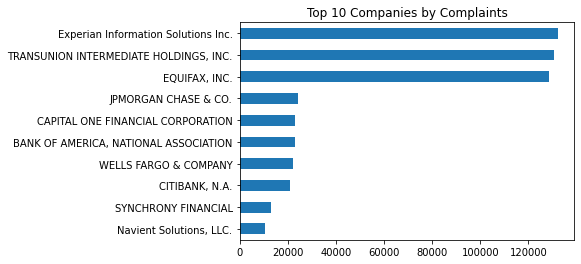

In [12]:
# Plot of Top 10 companies by complaints
complaints_data.Company.value_counts()[:10].sort_values().plot(title='Top 10 Companies by Complaints', kind='barh')

We can observe that the "Experian Information Solutions" has maximum customer compalints in all three years combined.

Also, the other 2 companies i.e. the "TRANSUNION INTERMEDIATE HOLDINGS INC" AND "EQUIFAX" do have a similar count of compliants that have been recorded in the past 3 years.

### Top 10 Complaints by Product

In [13]:
# Total Number of Complaints received in 2018,2019,2020 by products
complaints_data['Product'].value_counts()[:10]

Credit reporting, credit repair services, or other personal consumer reports    459335
Debt collection                                                                 139621
Credit card or prepaid card                                                      76754
Mortgage                                                                         66629
Checking or savings account                                                      62056
Student loan                                                                     19623
Money transfer, virtual currency, or money service                               17133
Vehicle loan or lease                                                            16749
Payday loan, title loan, or personal loan                                        12163
Name: Product, dtype: int64

We observe that the maximum complaints received were on the product type "Credit reporting, credit report services"

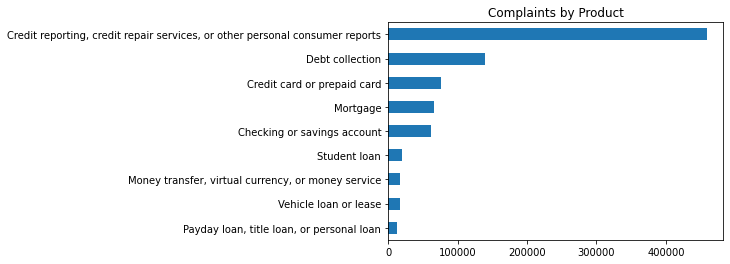

In [14]:
# Plot of the Total Number of Complaints received in 2018,2019,2020 by products
complaints_data['Product'].value_counts()[:10].sort_values().plot(title='Complaints by Product', kind='barh')

### Top 5 Complaints by Company Responses

In [15]:
#Distribution of response type by companies
complaints_data['Company response to consumer'].value_counts()

Closed with explanation            727839
Closed with non-monetary relief     99269
Closed with monetary relief         33092
In progress                          5984
Untimely response                    3877
Not given                               2
Name: Company response to consumer, dtype: int64

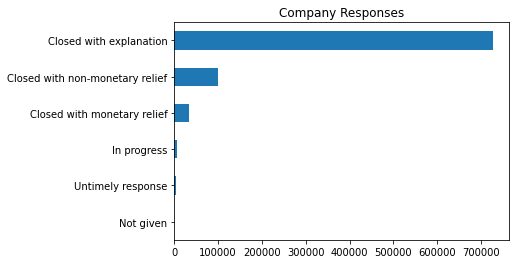

In [16]:
#Plot of response type by companies
complaints_data['Company response to consumer'].value_counts()[:10].sort_values().plot(title="Company Responses", kind='barh')

We can understand that most of the complaints received, were closed with the explanation. However, the Consumer disputed is not available to understand whether the customer satisfaction rate is high or low.

### Number of complaints with timely response

In [17]:
# Complaints resolved and unresolved
print('Number of complaints resolved and unresolved in the last three years')
print(complaints_data['Timely response?'].value_counts()[:10])

Number of complaints resolved and unresolved in the last three years
Yes    857591
No      12472
Name: Timely response?, dtype: int64


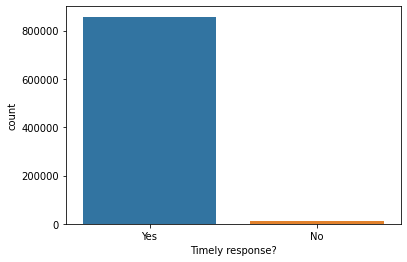

In [18]:
sns.countplot(data = complaints_data, x = 'Timely response?')

With almost 98% of the complaints being resolved, there is a discrepancy in understanding the customer satisfaction rate for these resolved complaints

### Complaints by the day of the week

In [19]:
#Number of Complaints by the day of the week

dups_complaints_data = df.copy() #Copied the df data as we need an "object" for "Date Received" parameter and for "complaints_data" dataframe "Date received" parameter has been changed to "datetimens" format
dups_complaints_data = df[(df['Date received'] > '2018-1-1') & (df['Date received'] <= '2020-10-31')] #CONSIDERING LAST 3 YEARS DATA FOR OUR ANALYSIS
date_series = dups_complaints_data.pop('Date received')
dups_complaints_data.index = pd.to_datetime(date_series, format='%m/%d/%Y')
dups_complaints_data['weekday'] = dups_complaints_data.index.weekday
dups_complaints_data = dups_complaints_data.replace({'weekday': {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
                                   3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}})

<ipython-input-19-2026df8d1ee6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dups_complaints_data['weekday'] = dups_complaints_data.index.weekday


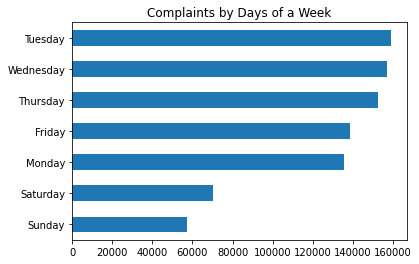

In [20]:
#Plot to observe which day of the week had maximum complaints
dups_complaints_data.weekday.value_counts().sort_values().plot(title='Complaints by Days of a Week', kind='barh')

As seen in bar plot, we observe a trend that Tuesday, Wednesday and Thursday do have maximum complaints in the week with weekends being a bit calm.

# 1.4 Descriptive Analytics


Descriptive statistics is an important component to make informed strategic business decisions based on historical data. 

In [21]:
complaints_data_desc = complaints_data.copy()

# The variable complaints_year gives the number of complaints registered in the years 2018,2019,and 2020 
# It can be observed that the 2020 has the most number of complaints, during the pandemic and is comparitively more than 2018 or 2019

complaints_year=complaints_data_desc.groupby(by = 'Year')['Complaint ID'].count()
print(f'\nThe number of complaints by year are \n{complaints_year}\n') 

# The variable complaints_state gives the number of complaints registerd by state in descending order - 
# From the output  we can observe that California has the highest number of complaints logged.

complaints_state=complaints_data_desc.groupby(by = 'State')['Complaint ID'].count().sort_values(ascending=False)
print(f'\nThe number of complaints by state are\n{complaints_state}\n')


# Timely response was recorded by yes or no & response_year exhibits the timely responses to the complaints sorted by each of the foloowing years(2018,2019,2020).

complaints_resp=complaints_data_desc.groupby('Year')['Timely response?'].value_counts()
print(f'\nThe timely response of a complaint based in following years\n{complaints_resp}\n')


# Complaints were submitted in various ways like Web,Email,Fax,Phone, Post mail,Referral, submittedby potrays the timely response of complaints submitted by each of these methods.

complaints_hist = complaints_data_desc.groupby('Submitted via')['Timely response?'].value_counts()
print(complaints_hist)


The number of complaints by year are 
Year
2018    257038
2019    277380
2020    335645
Name: Complaint ID, dtype: int64


The number of complaints by state are
State
CA    107900
FL    106767
TX     86128
NY     58730
GA     52359
       ...  
GU        67
AA        20
AS         7
MP         3
MH         1
Name: Complaint ID, Length: 63, dtype: int64


The timely response of a complaint based in following years
Year  Timely response?
2018  Yes                 252462
      No                    4576
2019  Yes                 273079
      No                    4301
2020  Yes                 332050
      No                    3595
Name: Timely response?, dtype: int64

Submitted via  Timely response?
Email          Yes                     67
Fax            Yes                   9714
               No                     107
Phone          Yes                  42992
               No                    1038
Postal mail    Yes                  21285
               No                     2

From the above output we observe that the number of complaints submitted via web were the highest and via fax were the lowest. 

So, analyzing both the data we can see that the complaints submitted via web and fax, maximum complaints were closed with an explaination and only few complaints did not get a timely response.

In [22]:
#The number of complaints submittes via web are the highest and via fax are the lowest so lets look at the companies responses to both of them

#response_web represents the company response to the customerss ubmitted via web

response_web = complaints_data_desc['Company response to consumer'][complaints_data_desc['Submitted via']=='Web'].value_counts()
print(f'\nThe company responses of complaints submitted by web are\n{response_web}\n')

#response_fax represents the company response to the customerss ubmitted via fax

response_fax = complaints_data_desc['Company response to consumer'][complaints_data_desc['Submitted via']=='Fax'].value_counts()
print(f'\nThe company responses of complaints submitted by fax are\n{response_fax}\n')


The company responses of complaints submitted by web are
Closed with explanation            619678
Closed with non-monetary relief     87982
Closed with monetary relief         23018
In progress                          4694
Untimely response                    3292
Not given                               2
Name: Company response to consumer, dtype: int64


The company responses of complaints submitted by fax are
Closed with explanation            8149
Closed with non-monetary relief    1423
Closed with monetary relief         181
In progress                          40
Untimely response                    28
Name: Company response to consumer, dtype: int64



As we observe that most of the complaints were closed with an explanation, we have analyzed the top 20 issues that were timely responded and were closed with an explanation. 

From the below analysis we can observe that complaints with incorrect information on the report and problem with a credit reporting company's investigation into an existing problem were resolved and colsed with an explanation.

In [23]:
#top 20 issues that closed with an explanation
complaints_data_desc.groupby('Company response to consumer')['Issue'].value_counts()[:20]

Company response to consumer  Issue                                                                           
Closed with explanation       Incorrect information on your report                                                258311
                              Problem with a credit reporting company's investigation into an existing problem     91732
                              Attempts to collect debt not owed                                                    58829
                              Improper use of your report                                                          31703
                              Managing an account                                                                  30289
                              Trouble during payment process                                                       28999
                              Written notification about debt                                                      27636
                              Struggling t

### Statewise Distribution of Consumer Complaints

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


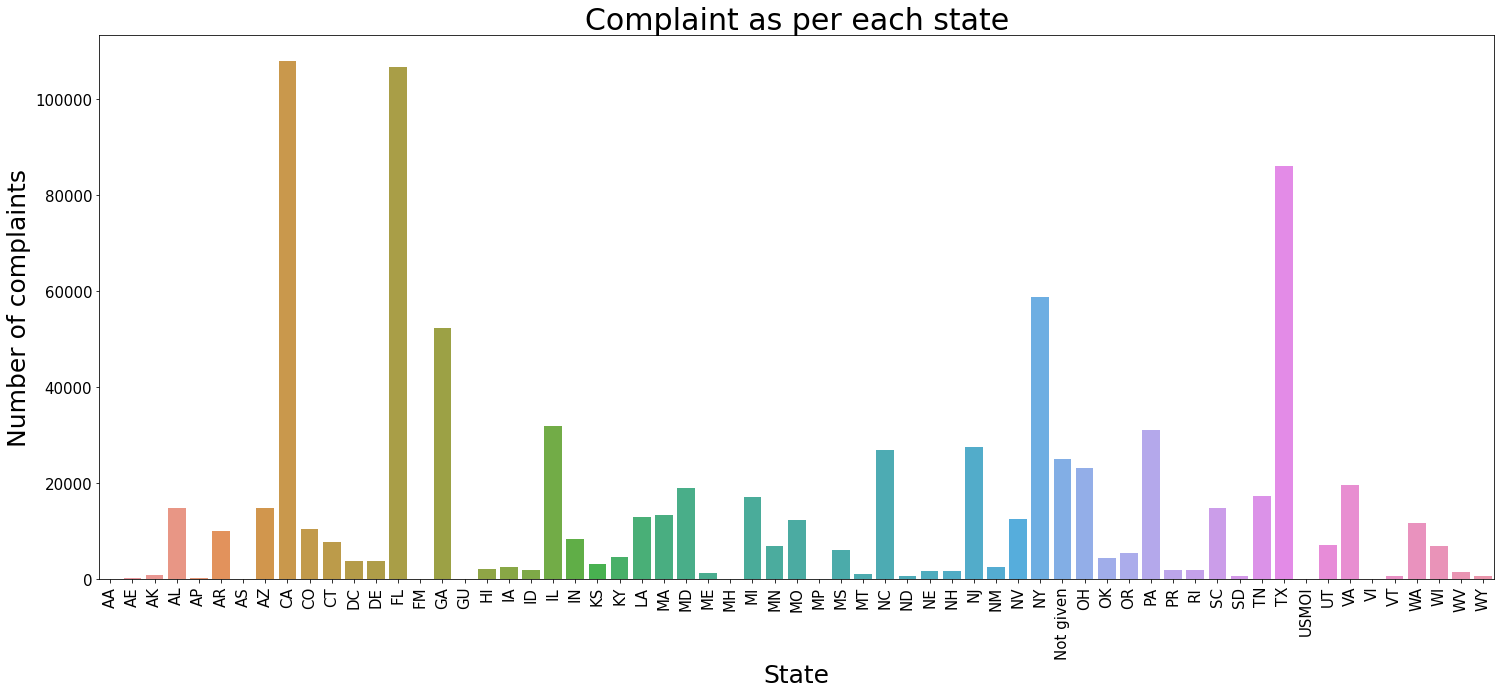

In [24]:
count=complaints_data[['State', 'Complaint ID', 'Date received']]
count

#As complaint ID has unique complaint, changing them to 1 to get cumulative sum.
count.loc[count['Complaint ID'] > 0, 'Complaint ID'] = 1
count

#Grouped the state and Date recieved columnn and taking cumulative sum
complaints_state=count.groupby(['State'])['Complaint ID'].sum().reset_index()

plt.figure(figsize=(25,10))

x = sns.barplot(x="State", y="Complaint ID", data=complaints_state)
plt.xticks(rotation=90)

plt.title('Complaint as per each state', fontsize=30)
plt.xlabel('State', fontsize=25)
plt.ylabel('Number of complaints', fontsize=25)
plt.tick_params(axis='both',labelsize=15)

California and Florida has the highest number of Compliants, that is observed in the last 3 years

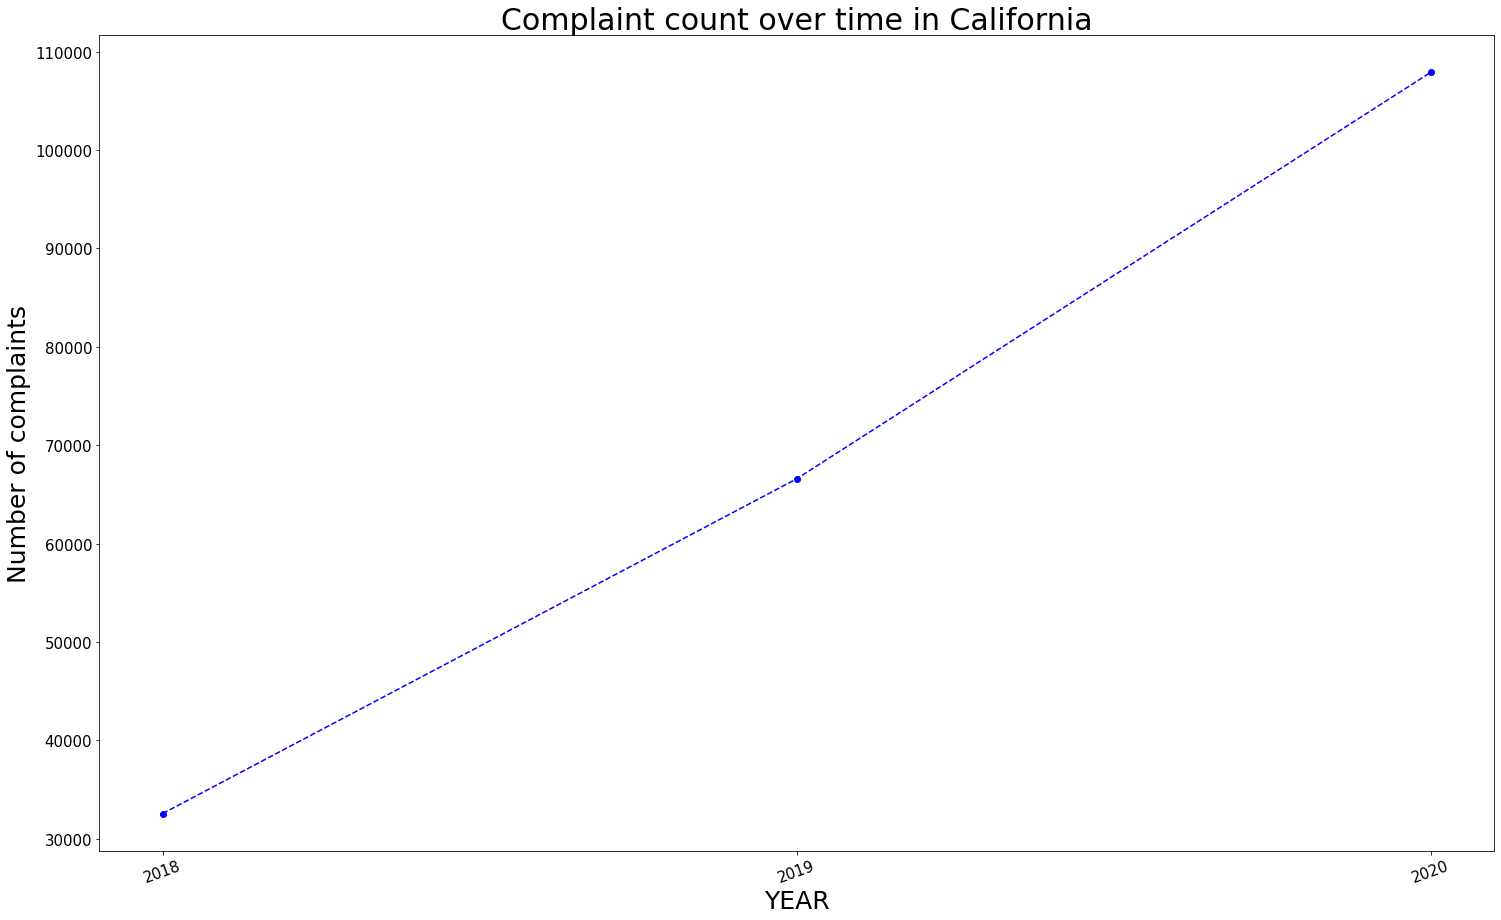

In [27]:
#count the dataframe with column storenum, STRSTATE, YEAR

complaints_data_ca=complaints_data[['Issue','State', 'Complaint ID', 'Year']]
complaints_data_ca

#As complaint ID has unique xomplaint, changing them to 1 to get cumulative sum.
complaints_data_ca.loc[count['Complaint ID'] > 0, 'Complaint ID'] = 1

# Year and states are grouped together and used cumusum function to get cumulative sum
complaints_ca=complaints_data_ca.groupby(['State','Year']).sum().groupby(level=[0]).cumsum(skipna=False)
complaints_ca_year = complaints_ca.reset_index()
complaints_ca_year

# d2 stores the data of state CA
complaints_ca=complaints_ca_year[complaints_ca_year['State']=='CA']
complaints_ca

plt.figure(figsize=(25, 15))


plt.plot(np.asarray(complaints_ca['Year']).astype(str),complaints_ca['Complaint ID'],linestyle='--', marker='o', color='b')
plt.title('Complaint count over time in California', fontsize=30)
plt.xlabel('YEAR', fontsize=25)
plt.ylabel('Number of complaints', fontsize=25)
plt.tick_params(axis='both',labelsize=15)
plt.xticks(rotation=20)
plt.show()

We can observe the linear increase in complaints for the state california for the past 3 years.

### Number of Complaints received in the last 3 years

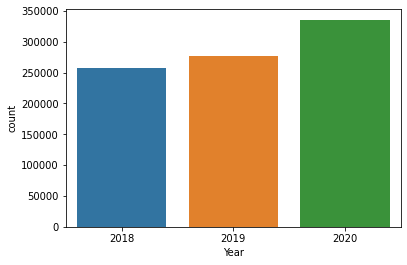

In [28]:
#Plot showing the number of Complaints by year
sns.countplot(data = complaints_data, x = 'Year')

As we can look into the plot, 2020 has the highest number of complaints when compared to the other years despite the pandemic. So, we can observe that there is a positive increase with the usage of the financial products in the year 2020 with 2 more months for the new year

### Number of Complaints received in 2018,2019,2020 by products

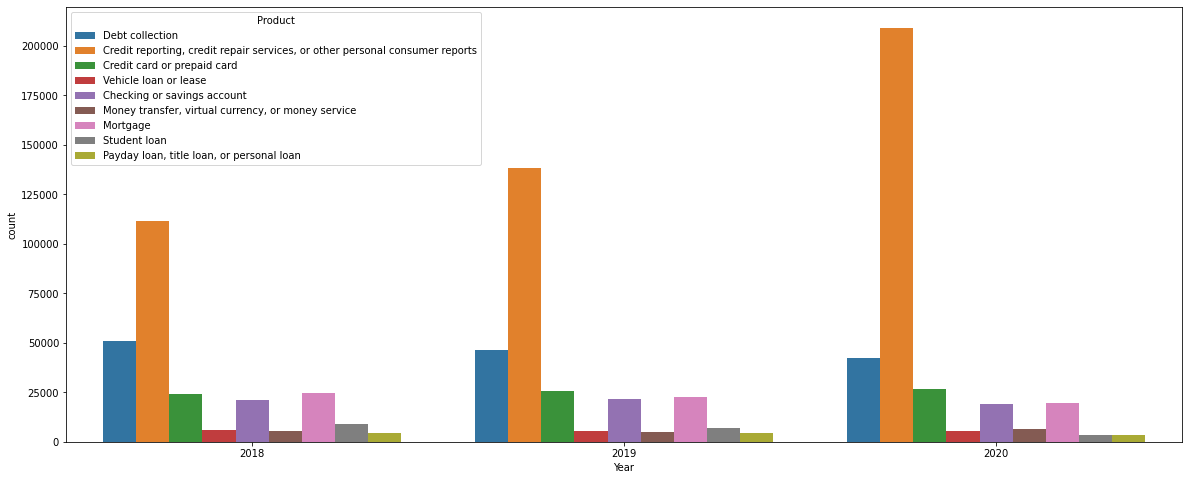

In [29]:
#Plot showing the number of Complaints by year and products
plt.figure(figsize=(20,8)) # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x="Year", hue= "Product" , data = complaints_data)
plt.show()

With this plot, we can understand that there is a positive increase in complaints with respect to the "Credit reporting, credit repair services" over the years with other products are limited to the same number of complaints.

The three nationwide credit reporting agencies (Equifax, Experian and TransUnion) are the most complained-about companies in the last 3 years and these are credit reporting agencies, so we can clearly make out why these companies are the top 3 companies by complaints as we can correlate this graph of complaints by year and product.

# 1.5 Predictive Analytics

Another important aspect to be considered with respect to the Consumer complaints is the resolution, which is important to any business or product. 

As the dataset comprises of Consumer Complaints on Financial products, here we are trying to build a model which can predict the narrative taken online as to which financial product or service it belongs to.

The classification task would help banking/financial institution to quickly identify and provide customized solutions to each customer based on complaints received product wise.



In [30]:
#importing sklean libraries for building a sample classification model using Logistic Regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, metrics
from sklearn.linear_model import LogisticRegression

In [31]:
#Factorizing the product column into categories
complaints_data['category_id'] = complaints_data['Product'].factorize()[0]

In [32]:
complaints_data['category_id'].nunique()

9

In [33]:
#splitting the data into train and test dataset
x_train, x_test, y_train, y_test = model_selection.train_test_split(complaints_data['Consumer complaint narrative'], complaints_data['Product'])

In [34]:
#word emedding using term frequency - inverse document frequency TFIDF
#Converting text to feature vectors was done using Term Frequency-Inverse Document Frequency

# It is a vectorizing technique to mainly measure and assign proportional weight to the words in the Consumer narratives

encoder = preprocessing.LabelEncoder() #Label encoding
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

tfidf_vec = TfidfVectorizer(analyzer='word',
                           token_pattern=r'\w{1,}',
                            max_features=5000)
tfidf_vec.fit(complaints_data['Consumer complaint narrative'])
xtrain_tfidf = tfidf_vec.transform(x_train)
xtest_tfidf = tfidf_vec.transform(x_test)

In [35]:
#Model Building 
model = linear_model.LogisticRegression(solver='newton-cg', multi_class='multinomial').fit(xtrain_tfidf,  y_train)

Logistic regression has been used build a multiclass classification model with solver and multiclass parameters

Multiclass classification is a classification task that consists of more than two classes, here we are trying to predict the financial product from the consumer narrative taken down during the logging of the complaint

Since it is a for multiclass problems, solver ‘newton' is used and multi-class is 'multinomial' to minimise the loss


In [36]:
#Model accuracy
accuracy = metrics.accuracy_score(model.predict(xtest_tfidf), y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.6793615182331415


In [37]:
# Multi-class classification report and the metrics associated to it
print(metrics.classification_report(y_test, model.predict(xtest_tfidf), 
                                    target_names=complaints_data['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                             Debt collection       0.79      0.27      0.40     15500
Credit reporting, credit repair services, or other personal consumer reports       0.79      0.37      0.51     19132
                                                 Credit card or prepaid card       0.64      0.97      0.77    114692
                                                       Vehicle loan or lease       0.80      0.38      0.51     35012
                                                 Checking or savings account       0.79      0.39      0.53      4290
                          Money transfer, virtual currency, or money service       0.89      0.39      0.55     16778
                                                                    Mortgage       0.69      0.24      0.36      3053
                                                       

In [38]:
#Model Accuracy test by passing the complaint and transforming it with Term Frequency-Inverse Document Frequency

consumer_complaint_sample = ["Equifax and XXXX should remove this account until a judgement is entered against me that I owe the debt."]
text_feature_vector = tfidf_vec.transform(consumer_complaint_sample)
prediction = model.predict(text_feature_vector)
print(consumer_complaint_sample)
print('predicted as: {}'.format(complaints_data.loc[complaints_data['category_id']==prediction[0], 'Product'].iloc[1]))

['Equifax and XXXX should remove this account until a judgement is entered against me that I owe the debt.']
predicted as: Credit card or prepaid card


In [39]:
#Model Accuracy test by passing the complaint and transforming it with Term Frequency-Inverse Document Frequency

consumer_complaint_sample = ["I have written several letters to date regarding information that is being reporting to my report from a relative with a similar name. Its has been more that 60 days"]
text_feature_vector = tfidf_vec.transform(consumer_complaint_sample)
prediction = model.predict(text_feature_vector)
print(consumer_complaint_sample)
print('predicted as: {}'.format(complaints_data.loc[complaints_data['category_id']==prediction[0], 'Product'].iloc[1]))

['I have written several letters to date regarding information that is being reporting to my report from a relative with a similar name. Its has been more that 60 days']
predicted as: Credit card or prepaid card


##### Accuracy of the model is around 68% and considering the subset of the data, it is giving expected predictions. However, we need to see if there are any alternate methods to increase the accuracy of the model so that, at the business level it does have an impact in solving various complaints at a shorter period of time assigning the ticket to the relevant product team for quick turn around time rather than delaying the resolution.

To conclude with, we have performed the analysis on this consumer complaint database and generated insights around the same by answering the posed business questions and also providing the visualisations for better clarity around the dataset and building a sample multiclassifier model that could benefit the financial firms around solving and tackling the complaints at a faster pace.